In [34]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from pygimli.viewer.mpl import draw1DColumn


In [35]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [20]:
east = pd.read_csv(dir + 'new_geom_factors/old/amphibious_ERT_eastern_transect.dat', sep='\s+', skiprows=9, header=None)
header = pd.read_table(dir + 'new_geom_factors/old/amphibious_ERT_eastern_transect.dat', nrows=9, header=None)
east

,0,1,2,3,4,5,6,7,8,9
0,4,0.0,-2.524,15.0,-2.589,5.0,-2.568,10.0,-2.645,2.02
1,4,5.0,-2.568,20.0,-2.560,10.0,-2.645,15.0,-2.589,2.04
2,4,10.0,-2.645,25.0,-2.544,15.0,-2.589,20.0,-2.560,2.12
3,4,15.0,-2.589,30.0,-2.363,20.0,-2.560,25.0,-2.544,2.18
4,4,20.0,-2.560,35.0,-2.248,25.0,-2.544,30.0,-2.363,2.20
...,...,...,...,...,...,...,...,...,...,...
1197,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
rC1P1 = np.abs(east.iloc[:, 5] - east.iloc[:, 1])
rC2P1 = np.abs(east.iloc[:, 5] - east.iloc[:, 3])
rC1P2 = np.abs(east.iloc[:, 7] - east.iloc[:, 1])
rC2P2 = np.abs(east.iloc[:, 7] - east.iloc[:, 3])
K = 2 * np.pi * 1/((1/rC1P1) - (1/rC2P1) - (1/rC1P2) + (1/rC2P2))
K

0       31.415927
1       31.415927
2       31.415927
3       31.415927
4       31.415927
          ...    
1197          NaN
1198          NaN
1199          NaN
1200          NaN
1201          NaN
Length: 1202, dtype: float64

In [22]:
east.iloc[:, 9] = (east.iloc[:, 9])/K
east

,0,1,2,3,4,5,6,7,8,9
0,4,0.0,-2.524,15.0,-2.589,5.0,-2.568,10.0,-2.645,0.064299
1,4,5.0,-2.568,20.0,-2.560,10.0,-2.645,15.0,-2.589,0.064935
2,4,10.0,-2.645,25.0,-2.544,15.0,-2.589,20.0,-2.560,0.067482
3,4,15.0,-2.589,30.0,-2.363,20.0,-2.560,25.0,-2.544,0.069392
4,4,20.0,-2.560,35.0,-2.248,25.0,-2.544,30.0,-2.363,0.070028
...,...,...,...,...,...,...,...,...,...,...
1197,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
header_str = header.to_csv(index=False, header=False, sep='\t')

# Save the result to a new file
output_file = dir + 'new_geom_factors/resistance/east_from_my_file.dat'

# Open the file and write the header first, followed by the data
with open(output_file, 'w') as f:
    # Write the header string first
    f.write(header_str)
    
    # Then append the data (without the header)
    east.to_csv(f, sep='\t', index=False, header=False)

In [25]:
data = ert.load(dir + 'new_geom_factors/resistance/east_from_my_file.dat')
data.save(dir+"new_geom_factors/resistance/east_from_my_file.txt", "a b m n err r")

22/10/24 - 10:02:55 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [36]:
data = ert.load(dir+"new_geom_factors/resistance/east_from_my_file.txt")

22/10/24 - 11:03:52 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
22/10/24 - 11:04:02 - pyGIMLi - INFO - Save RVector binary
22/10/24 - 11:04:02 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6305296296567867206


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x240f70c6050>)

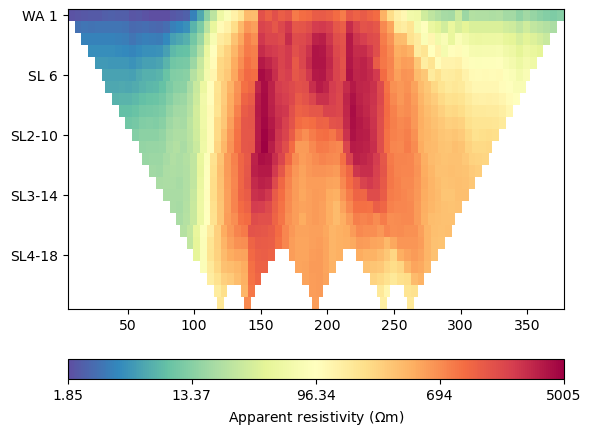

In [39]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
data['rhoa'] = data['r'] * data['k']
mgr = ert.ERTManager(data)
ert.showData(data)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x240f6369a90>)

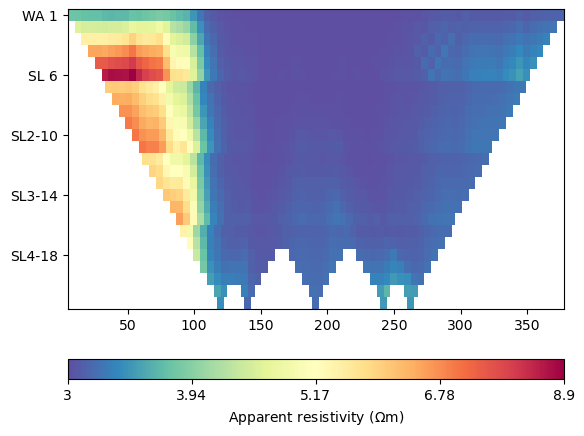

In [40]:

data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

22/10/24 - 11:04:13 - pyGIMLi - INFO - Found 2 regions.
22/10/24 - 11:04:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
22/10/24 - 11:04:13 - pyGIMLi - INFO - Found 2 regions.
22/10/24 - 11:04:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
22/10/24 - 11:04:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/10/24 - 11:04:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
22/10/24 - 11:04:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3919 Cells: 7304 Boundaries: 5744
22/10/24 - 11:04:14 - pyGIMLi - INFO - Use median(data values)=422.2849678868049
22/10/24 - 11:04:14 - pyGIMLi - INFO - Created startmodel from forward operator: 1548, min/max=422.284968/422.284968
22/10/24 - 11:04:14 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000240A78BB7E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000240F1D0AC50>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000240F5F53010>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2563.33
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  394.88 (dPhi = 84.38%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  109.13 (dPhi = 71.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   30.39 (dPhi = 68.53%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   17.38 (dPhi = 38.72%) lam: 20.0
----------------

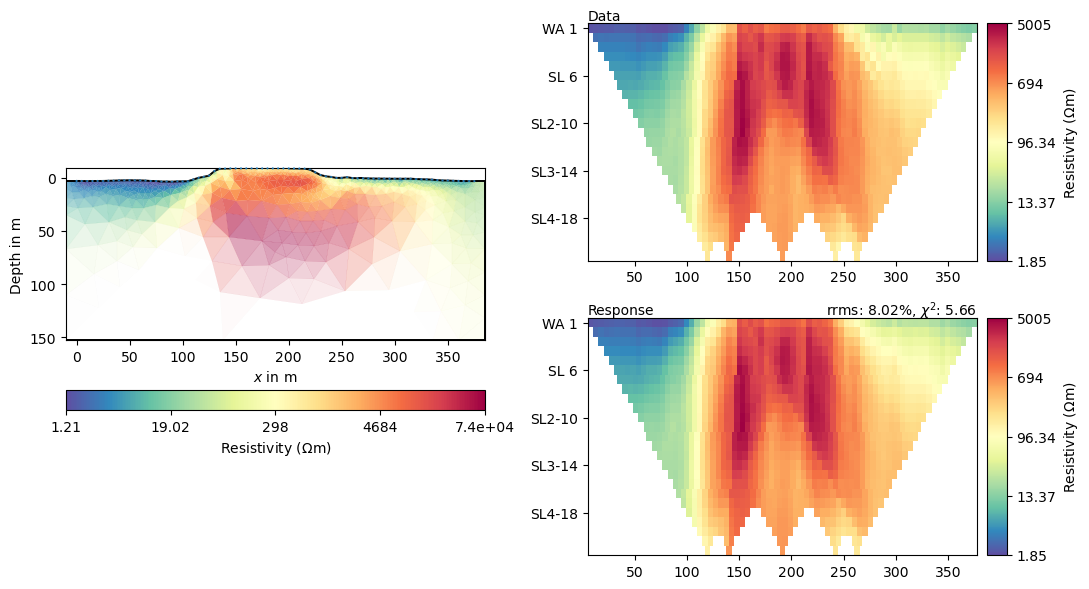

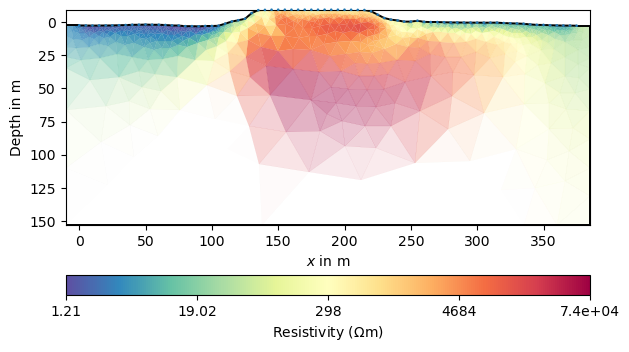

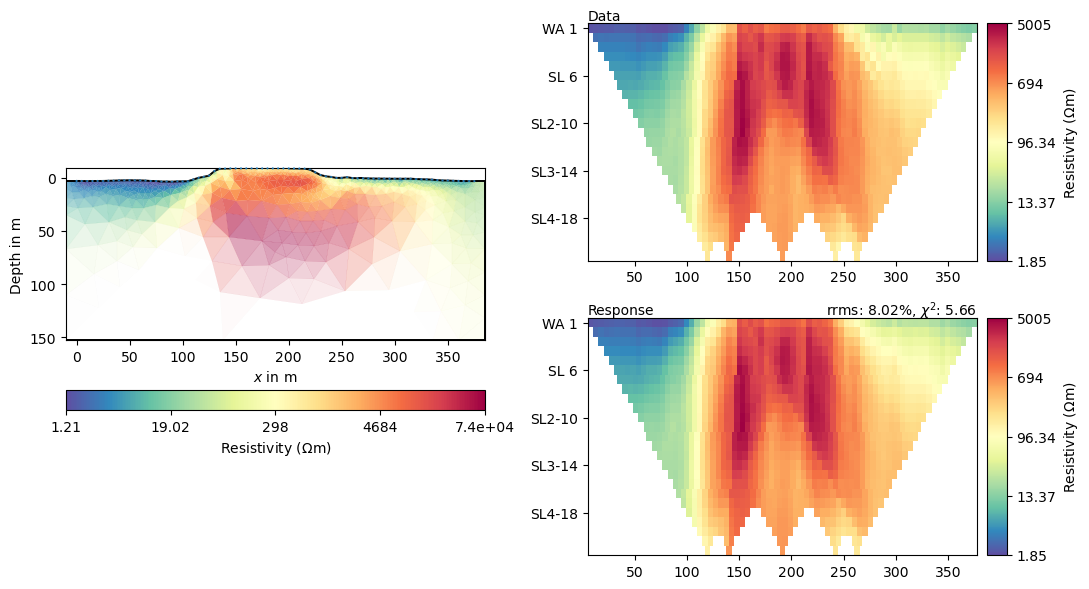

In [41]:

mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)

mgr.showResult()
mgr.showResultAndFit()

0 -10.000387192504098 -2.524 0.0
1 -10.000387192504098 -152.745 0.0
2 385.0003871925041 -152.745 0.0
3 385.0003871925041 -2.745 0.0
4 -1510.0003871925041 -2.524 0.0
5 -1510.0003871925041 -1652.524 0.0
6 1885.0003871925041 -2.745 0.0
7 1885.0003871925041 -1652.745 0.0
8 0.0 -2.524 0.0
9 1.25 -2.535 0.0
10 3.75 -2.557 0.0
11 5.0 -2.568 0.0
12 6.25 -2.58725 0.0
13 8.75 -2.62575 0.0
14 10.0 -2.645 0.0
15 11.25 -2.6310000000000002 0.0
16 13.75 -2.6029999999999998 0.0
17 15.0 -2.589 0.0
18 16.25 -2.58175 0.0
19 18.75 -2.56725 0.0
20 20.0 -2.56 0.0
21 21.25 -2.556 0.0
22 23.75 -2.548 0.0
23 25.0 -2.544 0.0
24 26.25 -2.4987500000000002 0.0
25 28.75 -2.40825 0.0
26 30.0 -2.363 0.0
27 31.25 -2.33425 0.0
28 33.75 -2.27675 0.0
29 35.0 -2.2479999999999998 0.0
30 36.25 -2.195 0.0
31 38.75 -2.089 0.0
32 40.0 -2.036 0.0
33 41.25 -2.029 0.0
34 43.75 -2.015 0.0
35 45.0 -2.008 0.0
36 46.25 -1.97375 0.0
37 48.75 -1.90525 0.0
38 50.0 -1.871 0.0
39 51.25 -1.90425 0.0
40 53.75 -1.97075 0.0
41 55.0 -2.004 0.0

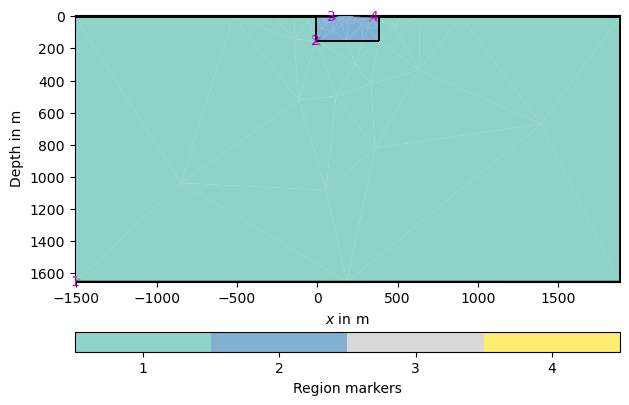

In [42]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y(), n.z())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())


plc.createNode(-10.000387192504098, 0, 0, marker=234)
#plc.createNode(113.5, 0, 0, marker=235)

plc.createNode(385.0003871925041 , 0, 0, marker=235)

plc.createEdge(plc.node(234), plc.node(76), marker=-1)
plc.createEdge(plc.node(234), plc.node(0), marker=-1)
plc.createEdge(plc.node(167), plc.node(235), marker=-1)
plc.createEdge(plc.node(235), plc.node(3), marker=-1)

plc.addRegionMarker([90, -1], marker=3)  
plc.addRegionMarker([350, -1.5], marker=4)  

ax, _ = pg.show(plc)


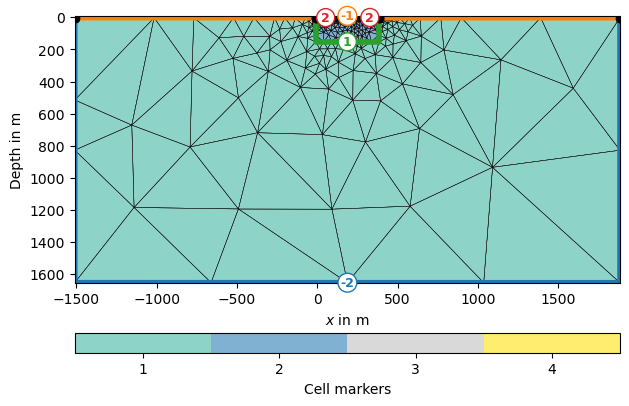

In [43]:
mesh = mt.createMesh(plc)
for b in mesh.boundaries():
    if b.marker() == -1 and not b.outside():
        b.setMarker(2)

#print(mesh)
ax, _ = pg.show(mesh, markers=True, showMesh=True)
#ax.set_ylim(-40)
#ax.set_xlim(-20,390)

22/10/24 - 11:06:11 - pyGIMLi - INFO - Found 4 regions.
22/10/24 - 11:06:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
22/10/24 - 11:06:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/10/24 - 11:06:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
22/10/24 - 11:06:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7028 Cells: 13292 Boundaries: 10350
22/10/24 - 11:06:12 - pyGIMLi - INFO - Use median(data values)=422.2849678868049
22/10/24 - 11:06:12 - pyGIMLi - INFO - Created startmodel from forward operator: 3060, min/max=422.284968/422.284968
22/10/24 - 11:06:12 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000240A78BB7E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000240F1D0AC50>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000240F47A10E0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000240F47A1BD0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000240F47A1CB0>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  460.27 (dPhi = 81.30%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  135.17 (dPhi = 70.05%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   35.55 (dPhi = 70.85%) lam: 20.0
------

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x241197896d0>)

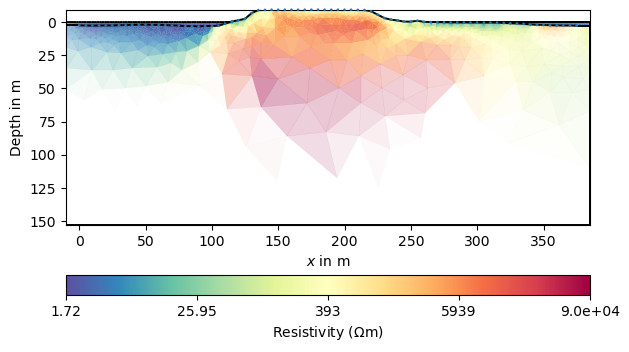

In [44]:
#mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

#mgr.inv.setRegularization(3)
#mgr.inv.setRegularization(4)

mgr.inv.setRegularization(3, limits=[1, 2])
mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

22/10/24 - 11:13:01 - pyGIMLi - INFO - Found 4 regions.
22/10/24 - 11:13:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
22/10/24 - 11:13:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/10/24 - 11:13:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
22/10/24 - 11:13:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7028 Cells: 13292 Boundaries: 10350
22/10/24 - 11:13:02 - pyGIMLi - INFO - Use median(data values)=422.2849678868049
22/10/24 - 11:13:02 - pyGIMLi - INFO - Created startmodel from forward operator: 2409, min/max=422.284968/422.284968
22/10/24 - 11:13:02 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000240A78BB7E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000240F1D0AC50>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000240F6D45E70>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1477.69
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  351.49 (dPhi = 75.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  351.49 (dPhi = 0.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  351.48 (dPhi = 0.00%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (

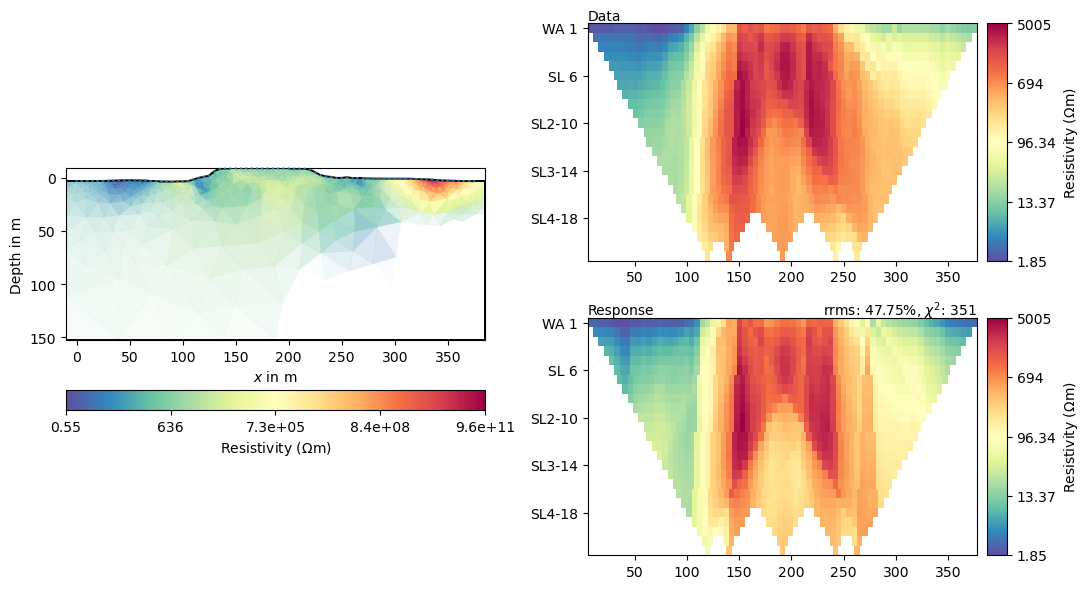

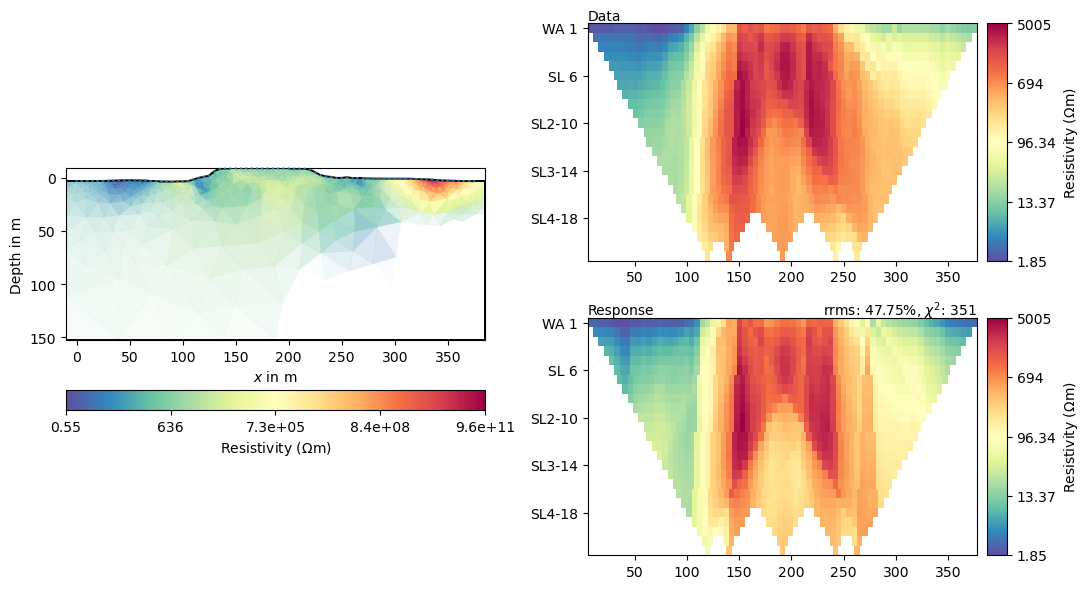

In [46]:
#mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(3, fix=1)
mgr.inv.setRegularization(4, fix=1)

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResultAndFit()

22/10/24 - 11:15:13 - pyGIMLi - INFO - Found 4 regions.
22/10/24 - 11:15:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
22/10/24 - 11:15:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
22/10/24 - 11:15:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
22/10/24 - 11:15:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7028 Cells: 13292 Boundaries: 10350
22/10/24 - 11:15:14 - pyGIMLi - INFO - Use median(data values)=422.2849678868049
22/10/24 - 11:15:14 - pyGIMLi - INFO - Created startmodel from forward operator: 2411, min/max=422.284968/422.284968
22/10/24 - 11:15:14 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000240A78BB7E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000240F1D0AC50>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000240F4127530>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000240F1A6CF90>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000240F172B450>
min/max (data): 1.85/5005
min/max (error): 3%/8.9%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2488.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  455.96 (dPhi = 81.56%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  133.48 (dPhi = 69.94%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   41.79 (dPhi = 66.07%) lam: 20.0
------

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x240edb252d0>)

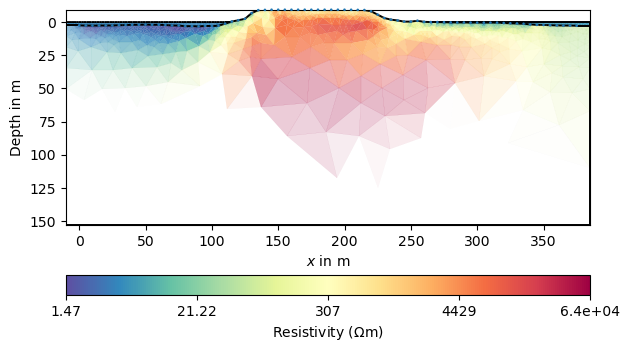

In [47]:
#mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(limits=[0, 0], trans="log")
mgr.inv.setRegularization(3, single=True)
mgr.inv.setRegularization(4, single=True)

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=20, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2)

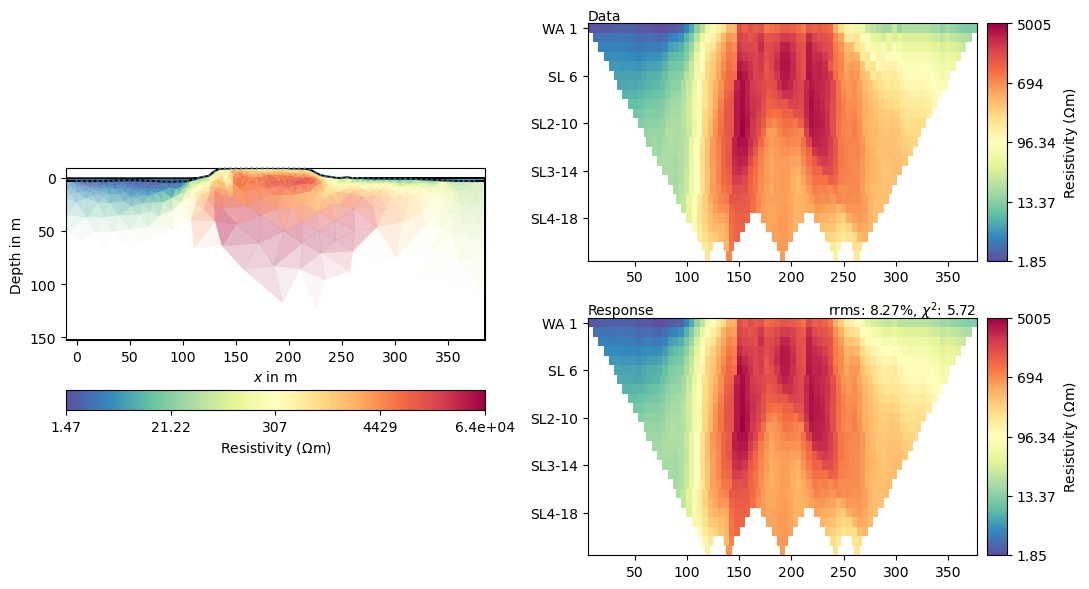

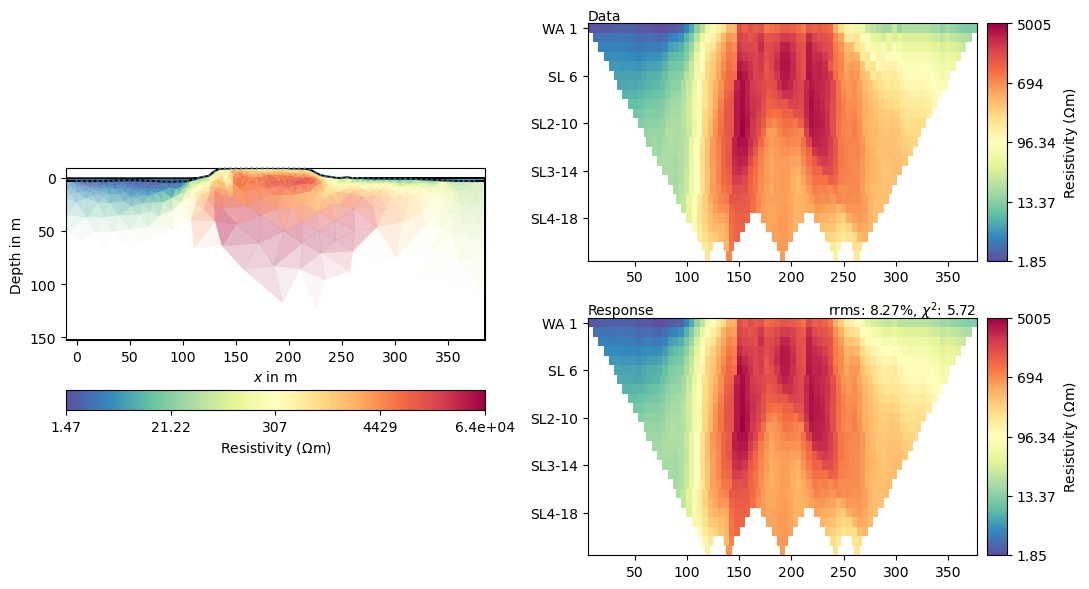

In [49]:

mgr.showResultAndFit()

22/10/24 - 11:21:37 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_eastern_new_rhoa\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_eastern_new_rhoa\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

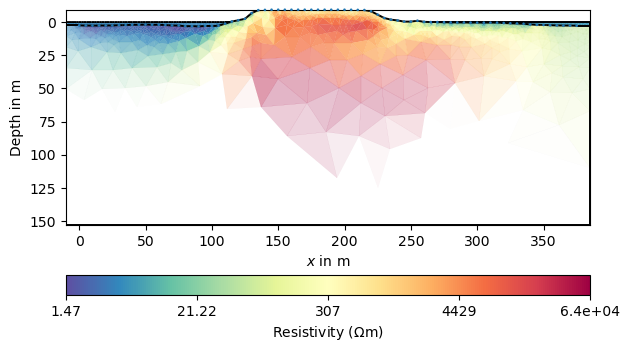

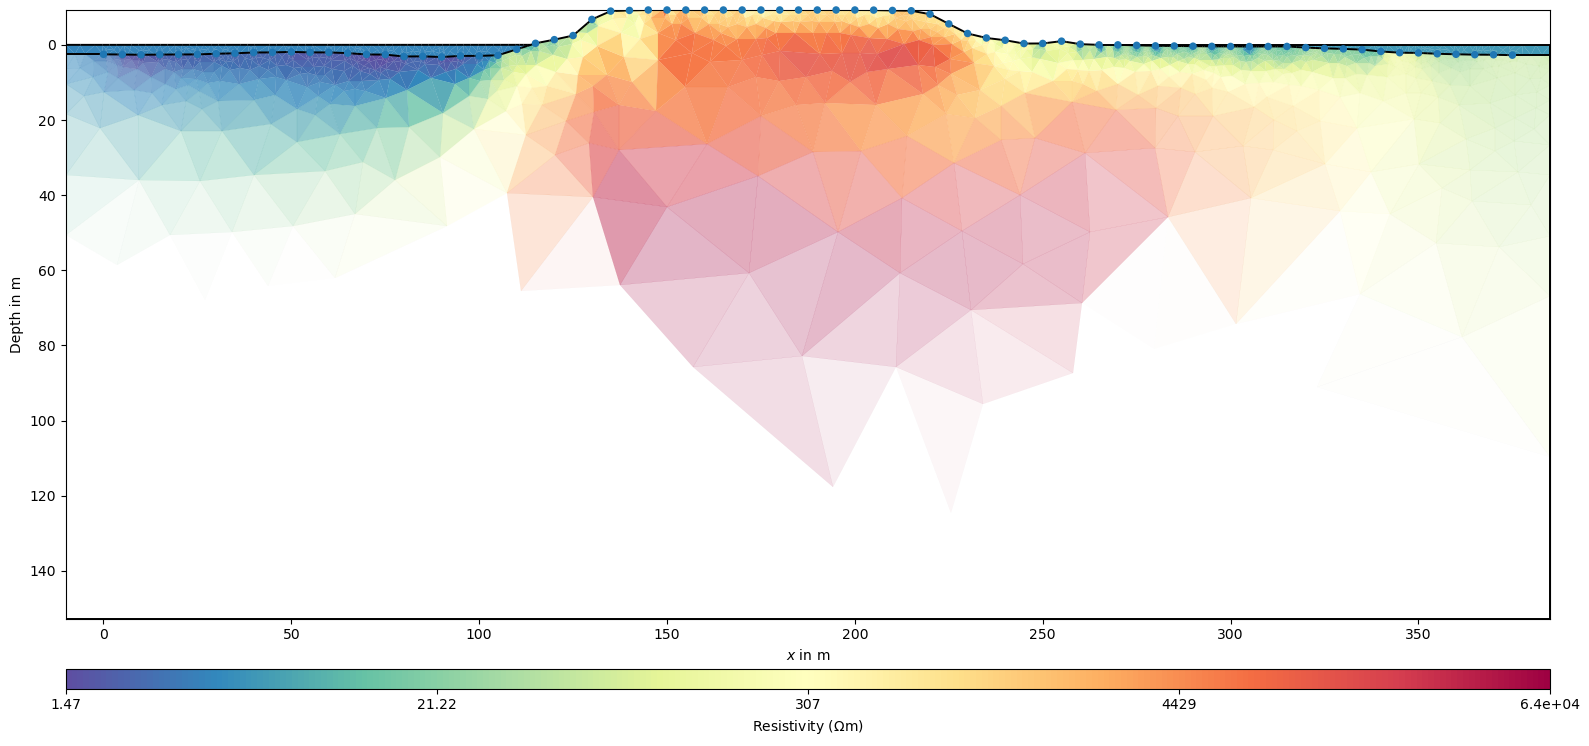

In [50]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_eastern_new_rhoa')

In [51]:
with open(dir+'processing/shoreline/joined_east.pkl', 'rb') as f:
    joined_east = pickle.load(f)

In [53]:
eastshore = joined_east[['year', 'xc', 'zc']].to_numpy()
eastshore[:, 1] = eastshore[:, 1].round(decimals=0)
eastshore[:, 2] = eastshore[:, 2].round(decimals=1)

#np.around(eastshore[:,1], decimals=3)

In [54]:
posVec2 = [pg.Pos(pos) for pos in zip(eastshore[:, 1], eastshore[:, 2])]
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))
# Initialize PriorModelling framework
fopDP = PriorModelling(para, posVec2)

# Get the model values for all positions
resMesh2 = fopDP(mgr.model)
# Create a mesh and set cell markers
#np.savetxt(dir+"out.txt", np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh)))
out2 = np.column_stack((eastshore[:, 1], eastshore[:, 2], resMesh2, eastshore[:, 0]))
out2 = np.c_[ out2, 2023 - out2[:, 3] ]

out2

22/10/24 - 17:02:32 - pyGIMLi - INFO - Found 1 regions.


array([[ 3.72000000e+02, -3.60000000e+00,  5.96737120e+01,
         1.96400000e+03,  5.90000000e+01],
       [ 3.72000000e+02, -5.60000000e+00,  6.00471057e+01,
         1.96400000e+03,  5.90000000e+01],
       [ 3.72000000e+02, -7.80000000e+00,  5.89063949e+01,
         1.96400000e+03,  5.90000000e+01],
       [ 3.72000000e+02, -1.02000000e+01,  5.74475465e+01,
         1.96400000e+03,  5.90000000e+01],
       [ 3.72000000e+02, -1.28000000e+01,  5.74475465e+01,
         1.96400000e+03,  5.90000000e+01],
       [ 3.72000000e+02, -1.57000000e+01,  5.57578683e+01,
         1.96400000e+03,  5.90000000e+01],
       [ 3.72000000e+02, -1.88000000e+01,  5.70952693e+01,
         1.96400000e+03,  5.90000000e+01],
       [ 3.72000000e+02, -2.23000000e+01,  5.57607983e+01,
         1.96400000e+03,  5.90000000e+01],
       [ 3.72000000e+02, -2.62000000e+01,  5.83398098e+01,
         1.96400000e+03,  5.90000000e+01],
       [ 3.72000000e+02, -3.04000000e+01,  6.23725969e+01,
         1.96400000e+03

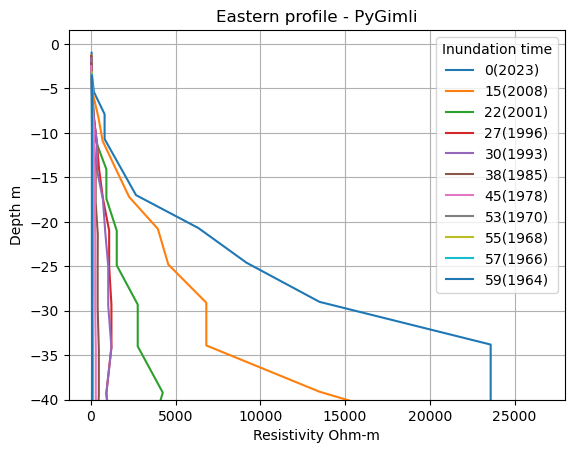

In [59]:
# Extracting unique years from the data
years = np.unique(out2[:, 4])

# Plotting each year's resistivity values with depth
for year in years:
    # Selecting data for the current year
    data_year = out2[out2[:, 4] == year]
    data_year_time = out2[out2[:, 3] == year]
    # Sorting the data based on depth
    
    # Plotting
    plt.plot(data_year[:, 2], data_year[:, 1], label=str(int(year)) + f'({int(2023 - year)})')

shorelines = np.unique(out2[:, 0])
np.savetxt(dir+"eastshore.csv", shorelines, delimiter=",", fmt="%d")
# Adding labels and legend
plt.ylabel('Depth m')
plt.ylim(-40)
plt.xlabel('Resistivity Ohm-m')
plt.title('Eastern profile - PyGimli')
plt.legend(title='Inundation time')
plt.grid(True)
plt.show()